In [1]:
%matplotlib inline
from keras.models import Sequential, save_model, load_model
from keras.layers import Dense, Dropout, BatchNormalization, Conv2D
from keras import optimizers, regularizers
from datetime import datetime
from keras.callbacks import ModelCheckpoint, TensorBoard
import numpy as np
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import h5py
import pandas as pd
import csv
np.random.seed(4)

Using TensorFlow backend.


### Import Data

In [2]:
## look data with pandas
train_file = "data/rupturemodel_train.txt"
val_file = "data/rupturemodel_xvalidate.txt"
test_file = "data/rupturemodel_test.txt"

df= pd.read_csv(train_file, sep=" ", header = None)
df_val= pd.read_csv(val_file, sep=" ", header = None)
df_test= pd.read_csv(test_file, sep=" ", header = None)

coloumns =  ['height', 'width', 'sxx', 'sxy', 'syy', 'sdrop', 'mud', 'dc', 'value']
df.columns = coloumns
df_val.columns = coloumns
df_test.columns = coloumns

df = df.append(df_val)
df = df.append(df_test)

### Data processing
We use StandardScaler preprocessing method of scikit. It standardizes features 
by removing the mean and scaling to unit variance

In [3]:
from keras.utils import to_categorical

mms = StandardScaler()
X = mms.fit_transform(df.drop('value', axis=1))
Y = to_categorical(df['value'].values)

print(X.shape)
print(Y.shape)

(2000, 8)
(2000, 2)


### Plot Heatmap
Heatmap Plots rectangular data as a color-encoded matrix. This is particularly interesting because the plot gives us a sense of relationship amoung the features. It also helps to decide to if a feature be deleted or kept.

In [4]:
# import seaborn as sns
# plt.figure(figsize=(18, 10))
# plt.rcParams.update({'font.size': 14})
# sns.heatmap(df.corr(), annot = True)

### Plot histogram of data
Histogram helps us a to see the distribution of data. It also helps to decide to if a feature be deleted or kept.

In [5]:
#plot Histogram
# plt.figure(figsize=(15, 5))
# for i, feature in enumerate(df.columns):
#     plt.subplot(1, 11, i+1)
#     df[feature].plot(kind='hist')
#     plt.xlabel(feature)

### Spliting data into train and test

In [6]:
X, Y = shuffle(X, Y, random_state=0)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

# print(X_train.shape)
# print(Y_train.shape)

### Model setup

In [7]:
def get_saved_model():
    loaded_model = load_model('./logs/rupture')
    loaded_model.load_weights('./logs/rupture_weights.epoch.499.hdf5')
    return loaded_model

def get_model(train_status):
    if train_status == 'new':   
        model = Sequential()
        model.add(Dense(units = 4, activation = 'relu', input_dim = X_train.shape[1], name='layer_1'))
        model.add(Dense(units = 4, activation = 'relu', name='layer_2'))
        model.add(Dense(units = 2, activation = 'relu', name='layer_3'))
        model.add(Dense(units = Y_train.shape[1], activation="softmax", name='Output_layer'))
        model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
        return model
    elif train_status == 'retrain':
        model = get_saved_model()
        model.compile('adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
        return model
        

### Training

In [8]:
# Training
# now = datetime.now()
# path = './graph/' + 'stress'+ now.strftime("%Y%m%d-%H%M")+'_drop_' +\
#         str(keep_prob)+'_layer_'+ str(no_of_layers) +'_data_'+ str(no_of_data) +\
#         '_neuron_' + str(no_of_neurons)

training_epochs = 750
train_status = 'new' # retrain or new
model = get_model(train_status)
# save_model(model, './logs/rupture')
# checkpoint = ModelCheckpoint(filepath='./logs/rupture_weights.epoch.{epoch:02d}.hdf5', verbose=0)

# tbCallBack = TensorBoard(log_dir=path, histogram_freq=1, write_graph=True)

# history = model.fit(X_train, Y_train, epochs = training_epochs, batch_size=batch_size, verbose=1, 
#                     callbacks=[checkpoint], validation_data=(X_test, Y_test))

history = model.fit(X_train, Y_train, batch_size = 10, epochs = training_epochs, 
           validation_split = 0.2, verbose=1)

score = model.evaluate(X_test, Y_test, batch_size=10)
print('Test score :', score)

Train on 1280 samples, validate on 320 samples
Epoch 1/750
1280/1280 [==============================] - 0s - loss: 0.6753 - acc: 0.6352 - val_loss: 0.6568 - val_acc: 0.6688
Epoch 2/750
1280/1280 [==============================] - 0s - loss: 0.6246 - acc: 0.6453 - val_loss: 0.5706 - val_acc: 0.6688
Epoch 3/750
1280/1280 [==============================] - 0s - loss: 0.5725 - acc: 0.6453 - val_loss: 0.5427 - val_acc: 0.6688
Epoch 4/750
1280/1280 [==============================] - 0s - loss: 0.5578 - acc: 0.6453 - val_loss: 0.5350 - val_acc: 0.6688
Epoch 5/750
1280/1280 [==============================] - 0s - loss: 0.5488 - acc: 0.6453 - val_loss: 0.5281 - val_acc: 0.6688
Epoch 6/750
1280/1280 [==============================] - 0s - loss: 0.5428 - acc: 0.6852 - val_loss: 0.5251 - val_acc: 0.7656
Epoch 7/750
1280/1280 [==============================] - 0s - loss: 0.5376 - acc: 0.7461 - val_loss: 0.5192 - val_acc: 0.7500
Epoch 8/750
1280/1280 [==============================] - 0s - loss: 0.5

1280/1280 [==============================] - 0s - loss: 0.4893 - acc: 0.7687 - val_loss: 0.4528 - val_acc: 0.8094
Epoch 66/750
1280/1280 [==============================] - 0s - loss: 0.4888 - acc: 0.7687 - val_loss: 0.4535 - val_acc: 0.8125
Epoch 67/750
1280/1280 [==============================] - 0s - loss: 0.4889 - acc: 0.7703 - val_loss: 0.4536 - val_acc: 0.8094
Epoch 68/750
1280/1280 [==============================] - 0s - loss: 0.4892 - acc: 0.7727 - val_loss: 0.4540 - val_acc: 0.8031
Epoch 69/750
1280/1280 [==============================] - 0s - loss: 0.4882 - acc: 0.7703 - val_loss: 0.4538 - val_acc: 0.8094
Epoch 70/750
1280/1280 [==============================] - 0s - loss: 0.4881 - acc: 0.7719 - val_loss: 0.4530 - val_acc: 0.8094
Epoch 71/750
1280/1280 [==============================] - 0s - loss: 0.4873 - acc: 0.7711 - val_loss: 0.4537 - val_acc: 0.8094
Epoch 72/750
1280/1280 [==============================] - 0s - loss: 0.4876 - acc: 0.7711 - val_loss: 0.4533 - val_acc: 0.80

1280/1280 [==============================] - 0s - loss: 0.4815 - acc: 0.7750 - val_loss: 0.4583 - val_acc: 0.8000
Epoch 130/750
1280/1280 [==============================] - 0s - loss: 0.4814 - acc: 0.7742 - val_loss: 0.4569 - val_acc: 0.7969
Epoch 131/750
1280/1280 [==============================] - 0s - loss: 0.4817 - acc: 0.7750 - val_loss: 0.4581 - val_acc: 0.8000
Epoch 132/750
1280/1280 [==============================] - 0s - loss: 0.4807 - acc: 0.7750 - val_loss: 0.4584 - val_acc: 0.8031
Epoch 133/750
1280/1280 [==============================] - 0s - loss: 0.4807 - acc: 0.7758 - val_loss: 0.4584 - val_acc: 0.8000
Epoch 134/750
1280/1280 [==============================] - 0s - loss: 0.4809 - acc: 0.7727 - val_loss: 0.4589 - val_acc: 0.7937
Epoch 135/750
1280/1280 [==============================] - 0s - loss: 0.4811 - acc: 0.7734 - val_loss: 0.4587 - val_acc: 0.8000
Epoch 136/750
1280/1280 [==============================] - 0s - loss: 0.4805 - acc: 0.7727 - val_loss: 0.4582 - val_ac

1280/1280 [==============================] - 0s - loss: 0.4712 - acc: 0.7750 - val_loss: 0.4744 - val_acc: 0.8000
Epoch 193/750
1280/1280 [==============================] - 0s - loss: 0.4702 - acc: 0.7742 - val_loss: 0.4755 - val_acc: 0.7906
Epoch 194/750
1280/1280 [==============================] - 0s - loss: 0.4704 - acc: 0.7797 - val_loss: 0.4754 - val_acc: 0.7906
Epoch 195/750
1280/1280 [==============================] - 0s - loss: 0.4711 - acc: 0.7781 - val_loss: 0.4766 - val_acc: 0.7937
Epoch 196/750
1280/1280 [==============================] - 0s - loss: 0.4701 - acc: 0.7797 - val_loss: 0.4748 - val_acc: 0.7906
Epoch 197/750
1280/1280 [==============================] - 0s - loss: 0.4692 - acc: 0.7742 - val_loss: 0.4766 - val_acc: 0.8062
Epoch 198/750
1280/1280 [==============================] - 0s - loss: 0.4694 - acc: 0.7773 - val_loss: 0.4760 - val_acc: 0.7875
Epoch 199/750
1280/1280 [==============================] - 0s - loss: 0.4694 - acc: 0.7820 - val_loss: 0.4784 - val_ac

1280/1280 [==============================] - 0s - loss: 0.4634 - acc: 0.7820 - val_loss: 0.4726 - val_acc: 0.7969
Epoch 257/750
1280/1280 [==============================] - 0s - loss: 0.4642 - acc: 0.7883 - val_loss: 0.4719 - val_acc: 0.8062
Epoch 258/750
1280/1280 [==============================] - 0s - loss: 0.4639 - acc: 0.7836 - val_loss: 0.4710 - val_acc: 0.8062
Epoch 259/750
1280/1280 [==============================] - 0s - loss: 0.4634 - acc: 0.7859 - val_loss: 0.4716 - val_acc: 0.8000
Epoch 260/750
1280/1280 [==============================] - 0s - loss: 0.4632 - acc: 0.7812 - val_loss: 0.4705 - val_acc: 0.8063
Epoch 261/750
1280/1280 [==============================] - 0s - loss: 0.4631 - acc: 0.7828 - val_loss: 0.4715 - val_acc: 0.8000
Epoch 262/750
1280/1280 [==============================] - 0s - loss: 0.4635 - acc: 0.7836 - val_loss: 0.4735 - val_acc: 0.8094
Epoch 263/750
1280/1280 [==============================] - 0s - loss: 0.4626 - acc: 0.7852 - val_loss: 0.4695 - val_ac

1280/1280 [==============================] - 0s - loss: 0.4540 - acc: 0.7898 - val_loss: 0.4664 - val_acc: 0.8187
Epoch 321/750
1280/1280 [==============================] - 0s - loss: 0.4528 - acc: 0.7898 - val_loss: 0.4643 - val_acc: 0.8125
Epoch 322/750
1280/1280 [==============================] - 0s - loss: 0.4535 - acc: 0.7906 - val_loss: 0.4661 - val_acc: 0.8094
Epoch 323/750
1280/1280 [==============================] - 0s - loss: 0.4532 - acc: 0.7961 - val_loss: 0.4653 - val_acc: 0.8094
Epoch 324/750
1280/1280 [==============================] - 0s - loss: 0.4524 - acc: 0.7930 - val_loss: 0.4657 - val_acc: 0.8125
Epoch 325/750
1280/1280 [==============================] - 0s - loss: 0.4533 - acc: 0.7906 - val_loss: 0.4645 - val_acc: 0.8031
Epoch 326/750
1280/1280 [==============================] - 0s - loss: 0.4527 - acc: 0.7906 - val_loss: 0.4653 - val_acc: 0.8156
Epoch 327/750
1280/1280 [==============================] - 0s - loss: 0.4525 - acc: 0.7883 - val_loss: 0.4661 - val_ac

1280/1280 [==============================] - 0s - loss: 0.4449 - acc: 0.7953 - val_loss: 0.4662 - val_acc: 0.8125
Epoch 384/750
1280/1280 [==============================] - 0s - loss: 0.4417 - acc: 0.7992 - val_loss: 0.4713 - val_acc: 0.7937
Epoch 385/750
1280/1280 [==============================] - 0s - loss: 0.4480 - acc: 0.7969 - val_loss: 0.4696 - val_acc: 0.8156
Epoch 386/750
1280/1280 [==============================] - 0s - loss: 0.4428 - acc: 0.8062 - val_loss: 0.4701 - val_acc: 0.8125
Epoch 387/750
1280/1280 [==============================] - 0s - loss: 0.4452 - acc: 0.7977 - val_loss: 0.4663 - val_acc: 0.8156
Epoch 388/750
1280/1280 [==============================] - 0s - loss: 0.4443 - acc: 0.8055 - val_loss: 0.4676 - val_acc: 0.8156
Epoch 389/750
1280/1280 [==============================] - 0s - loss: 0.4423 - acc: 0.8086 - val_loss: 0.4651 - val_acc: 0.8000
Epoch 390/750
1280/1280 [==============================] - 0s - loss: 0.4432 - acc: 0.7992 - val_loss: 0.4657 - val_ac

1280/1280 [==============================] - 0s - loss: 0.4395 - acc: 0.8094 - val_loss: 0.4715 - val_acc: 0.8156
Epoch 448/750
1280/1280 [==============================] - 0s - loss: 0.4390 - acc: 0.8109 - val_loss: 0.4698 - val_acc: 0.8094
Epoch 449/750
1280/1280 [==============================] - 0s - loss: 0.4385 - acc: 0.8109 - val_loss: 0.4708 - val_acc: 0.8125
Epoch 450/750
1280/1280 [==============================] - 0s - loss: 0.4383 - acc: 0.8164 - val_loss: 0.4692 - val_acc: 0.8094
Epoch 451/750
1280/1280 [==============================] - 0s - loss: 0.4385 - acc: 0.8148 - val_loss: 0.4700 - val_acc: 0.8156
Epoch 452/750
1280/1280 [==============================] - 0s - loss: 0.4396 - acc: 0.8086 - val_loss: 0.4708 - val_acc: 0.8125
Epoch 453/750
1280/1280 [==============================] - 0s - loss: 0.4398 - acc: 0.8094 - val_loss: 0.4709 - val_acc: 0.8125
Epoch 454/750
1280/1280 [==============================] - 0s - loss: 0.4393 - acc: 0.8117 - val_loss: 0.4689 - val_ac

1280/1280 [==============================] - 0s - loss: 0.4382 - acc: 0.8102 - val_loss: 0.4706 - val_acc: 0.8094
Epoch 512/750
1280/1280 [==============================] - 0s - loss: 0.4367 - acc: 0.8102 - val_loss: 0.4720 - val_acc: 0.8031
Epoch 513/750
1280/1280 [==============================] - 0s - loss: 0.4386 - acc: 0.8055 - val_loss: 0.4770 - val_acc: 0.8094
Epoch 514/750
1280/1280 [==============================] - 0s - loss: 0.4367 - acc: 0.8227 - val_loss: 0.4770 - val_acc: 0.8062
Epoch 515/750
1280/1280 [==============================] - 0s - loss: 0.4371 - acc: 0.8164 - val_loss: 0.4782 - val_acc: 0.7937
Epoch 516/750
1280/1280 [==============================] - 0s - loss: 0.4371 - acc: 0.8172 - val_loss: 0.4794 - val_acc: 0.7969
Epoch 517/750
1280/1280 [==============================] - 0s - loss: 0.4412 - acc: 0.8109 - val_loss: 0.4723 - val_acc: 0.8125
Epoch 518/750
1280/1280 [==============================] - 0s - loss: 0.4377 - acc: 0.8109 - val_loss: 0.4712 - val_ac

1280/1280 [==============================] - 0s - loss: 0.4351 - acc: 0.8156 - val_loss: 0.4688 - val_acc: 0.8062
Epoch 576/750
1280/1280 [==============================] - 0s - loss: 0.4365 - acc: 0.8203 - val_loss: 0.4749 - val_acc: 0.8125
Epoch 577/750
1280/1280 [==============================] - 0s - loss: 0.4347 - acc: 0.8164 - val_loss: 0.4732 - val_acc: 0.8062
Epoch 578/750
1280/1280 [==============================] - 0s - loss: 0.4343 - acc: 0.8156 - val_loss: 0.4788 - val_acc: 0.8125
Epoch 579/750
1280/1280 [==============================] - 0s - loss: 0.4361 - acc: 0.8156 - val_loss: 0.4690 - val_acc: 0.8062
Epoch 580/750
1280/1280 [==============================] - 0s - loss: 0.4347 - acc: 0.8141 - val_loss: 0.4742 - val_acc: 0.8156
Epoch 581/750
1280/1280 [==============================] - 0s - loss: 0.4369 - acc: 0.8148 - val_loss: 0.4653 - val_acc: 0.8125
Epoch 582/750
1280/1280 [==============================] - 0s - loss: 0.4364 - acc: 0.8141 - val_loss: 0.4710 - val_ac

1280/1280 [==============================] - 0s - loss: 0.4341 - acc: 0.8141 - val_loss: 0.4738 - val_acc: 0.8062
Epoch 640/750
1280/1280 [==============================] - 0s - loss: 0.4340 - acc: 0.8195 - val_loss: 0.4726 - val_acc: 0.8125
Epoch 641/750
1280/1280 [==============================] - 0s - loss: 0.4342 - acc: 0.8180 - val_loss: 0.4752 - val_acc: 0.8156
Epoch 642/750
1280/1280 [==============================] - 0s - loss: 0.4351 - acc: 0.8164 - val_loss: 0.4755 - val_acc: 0.8187
Epoch 643/750
1280/1280 [==============================] - 0s - loss: 0.4338 - acc: 0.8117 - val_loss: 0.4744 - val_acc: 0.8094
Epoch 644/750
1280/1280 [==============================] - 0s - loss: 0.4346 - acc: 0.8195 - val_loss: 0.4731 - val_acc: 0.8125
Epoch 645/750
1280/1280 [==============================] - 0s - loss: 0.4322 - acc: 0.8164 - val_loss: 0.4734 - val_acc: 0.8156
Epoch 646/750
1280/1280 [==============================] - 0s - loss: 0.4328 - acc: 0.8156 - val_loss: 0.4813 - val_ac

1280/1280 [==============================] - 0s - loss: 0.4317 - acc: 0.8234 - val_loss: 0.4762 - val_acc: 0.8094
Epoch 704/750
1280/1280 [==============================] - 0s - loss: 0.4333 - acc: 0.8273 - val_loss: 0.4830 - val_acc: 0.8156
Epoch 705/750
1280/1280 [==============================] - 0s - loss: 0.4299 - acc: 0.8211 - val_loss: 0.4815 - val_acc: 0.8094
Epoch 706/750
1280/1280 [==============================] - 0s - loss: 0.4323 - acc: 0.8187 - val_loss: 0.4699 - val_acc: 0.8094
Epoch 707/750
1280/1280 [==============================] - 0s - loss: 0.4330 - acc: 0.8234 - val_loss: 0.4796 - val_acc: 0.8062
Epoch 708/750
1280/1280 [==============================] - 0s - loss: 0.4327 - acc: 0.8195 - val_loss: 0.4868 - val_acc: 0.8156
Epoch 709/750
1280/1280 [==============================] - 0s - loss: 0.4316 - acc: 0.8219 - val_loss: 0.4833 - val_acc: 0.8094
Epoch 710/750
1280/1280 [==============================] - 0s - loss: 0.4338 - acc: 0.8195 - val_loss: 0.4883 - val_ac

In [9]:
Y_pred = model.predict(X_test)
Y_test_class = np.argmax(Y_test, axis = 1)
Y_pred_class = np.argmax(Y_pred, axis = 1)

In [10]:
# Benchmark
pd.Series(Y_test_class).value_counts()

0    273
1    127
dtype: int64

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(Y_test_class, Y_pred_class))
print(classification_report(Y_test_class, Y_pred_class))
print('---------- Confusion matrix ----------')
confusion_matrix(Y_test_class, Y_pred_class)

0.8075
             precision    recall  f1-score   support

          0       0.85      0.87      0.86       273
          1       0.71      0.67      0.69       127

avg / total       0.81      0.81      0.81       400

---------- Confusion matrix ----------


array([[238,  35],
       [ 42,  85]])

## Plot accuracy 

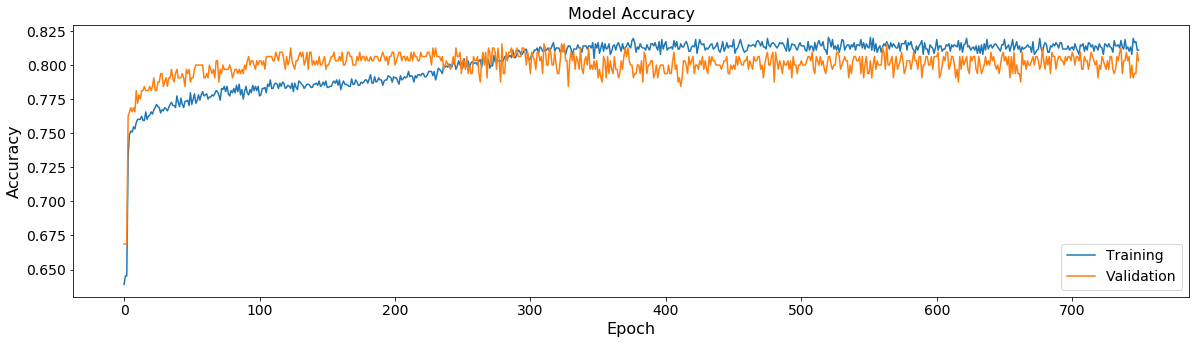

In [12]:
#print(history.history.keys())

plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(20,5))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy', size=16)
plt.ylabel('Accuracy', size=16)
plt.xlabel('Epoch', size=16)
plt.legend(['Training', 'Validation'], loc='lower right')


In [15]:
# model accuracy at different random seed
data = pd.DataFrame({'Random seed':[5, 6, 7, 8, 9],
                     'Accuracy' : [0.8075, 0.845, 0.8375, 0.845, 0.8225],
                    'Total_yes': [238, 244, 244, 244, 240],
                    'Total_No': [85, 94, 91, 94, 899],
                    'Layer_sequence':['4-4-2-2','4-4-2-2', '4-4-2-2', '4-4-2-2', '4-4-2-2'],
                    'overfitting' : ['slight underfitting', 'Perfect', 'Perfect', 'Slight overfitting', 'Underfitting']})
data

,Accuracy,Layer_sequence,Random seed,Total_No,Total_yes,overfitting
0,0.8075,4-4-2-2,5,85,238,slight underfitting
1,0.8450,4-4-2-2,6,94,244,Perfect
2,0.8375,4-4-2-2,7,91,244,Perfect
3,0.8450,4-4-2-2,8,94,244,Slight overfitting
4,0.8225,4-4-2-2,9,899,240,Underfitting
